In [264]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



In [265]:
import os

files = os.listdir('.')
print(files)


['gaussian_filter.jpg', 'grad3.JPG', 'gaussian_filter_noisy.jpg', 'horizontal_detail_LH.png', 'diagonal_detail_HH.png', 'diagonal_detail_HH_noisy.png', 'horizontal_detail_LH_noisy_inverted.png', 'gaussian_filter_noisy_inverted.jpg', 'grad_grayscale.jpg', 'horizontal_detail_LH_inverted.png', 'horizontal_detail_LH_noisy.png', 'gaussian_filter_inverted.jpg', 'image_creation.ipynb', 'diagonal_detail_HH_noisy_inverted.png', 'grad_grayscale_inverted.jpg', 'diagonal_detail_HH_inverted.png']


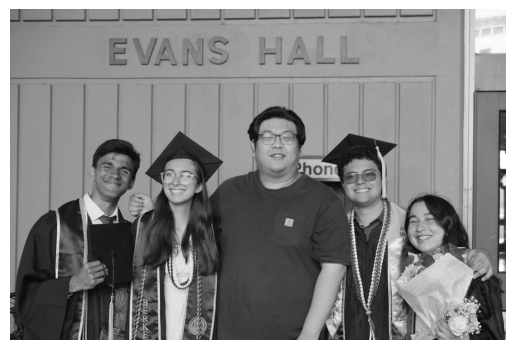

In [266]:
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
gray_img = np.array(Image.open("grad3.jpg").convert("L"))
plt.imshow(gray_img, cmap='gray')
plt.imsave('grad_grayscale.jpg', gray_img, cmap='gray')
#plt.title('Cameraman (Normal)')
plt.axis('off')
plt.show()

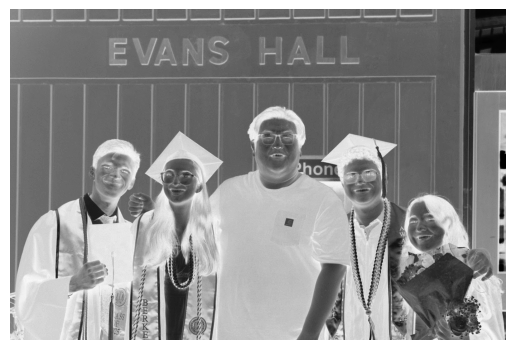

In [267]:
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
gray_img_inv = 255 - np.array(Image.open("grad3.jpg").convert("L"))
plt.imshow(gray_img_inv, cmap='gray')
plt.imsave('grad_grayscale_inverted.jpg', gray_img_inv, cmap='gray')
#plt.title('Cameraman (Normal)')
plt.axis('off')
plt.show()

# Gaussian Filter

In [268]:
blur_level = 10
salt_pepper_amount = 0.4
from scipy.ndimage import gaussian_filter

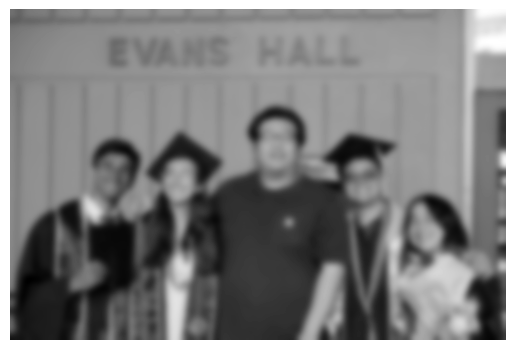

In [269]:
transformed_image = gaussian_filter(gray_img, sigma=blur_level)


plt.imshow(transformed_image, cmap='gray')
plt.axis('off')


plt.imsave('gaussian_filter.jpg', transformed_image, cmap='gray')

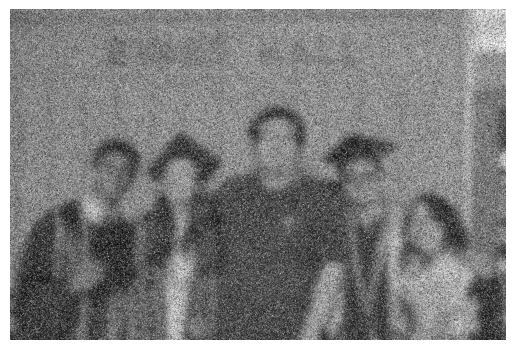

In [270]:
transformed_image = gaussian_filter(gray_img, sigma=blur_level)

noisy = transformed_image.copy()
num_salt = np.ceil(salt_pepper_amount * noisy.size * 0.5).astype(int)
num_pepper = np.ceil(salt_pepper_amount * noisy.size * 0.5).astype(int)

# Salt noise
coords = [np.random.randint(0, i, num_salt) for i in noisy.shape]
noisy[tuple(coords)] = 255

# Pepper noise
coords = [np.random.randint(0, i, num_pepper) for i in noisy.shape]
noisy[tuple(coords)] = 0

transformed_image = noisy

plt.imshow(transformed_image, cmap='gray')
plt.axis('off')


plt.imsave('gaussian_filter_noisy.jpg', transformed_image, cmap='gray')

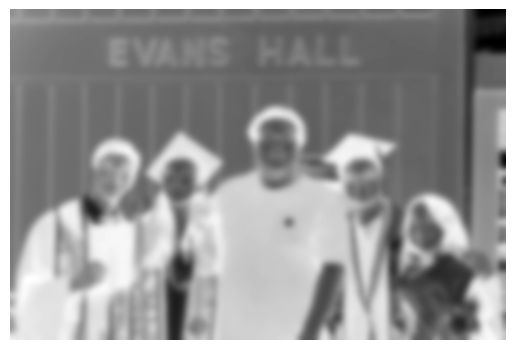

In [271]:
transformed_image = gaussian_filter(255 - gray_img, sigma=blur_level)


plt.imshow(transformed_image, cmap='gray')
plt.axis('off')


plt.imsave('gaussian_filter_inverted.jpg', transformed_image, cmap='gray')

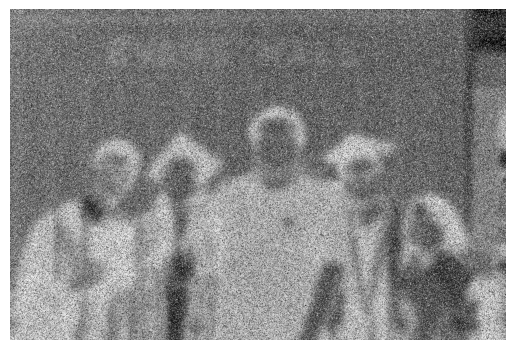

In [272]:
transformed_image = gaussian_filter(255 -gray_img, sigma=blur_level)

noisy = transformed_image.copy()
num_salt = np.ceil(salt_pepper_amount * noisy.size * 0.5).astype(int)
num_pepper = np.ceil(salt_pepper_amount * noisy.size * 0.5).astype(int)

# Salt noise
coords = [np.random.randint(0, i, num_salt) for i in noisy.shape]
noisy[tuple(coords)] = 255

# Pepper noise
coords = [np.random.randint(0, i, num_pepper) for i in noisy.shape]
noisy[tuple(coords)] = 0

transformed_image = noisy

plt.imshow(transformed_image, cmap='gray')
plt.axis('off')


plt.imsave('gaussian_filter_noisy_inverted.jpg', transformed_image, cmap='gray')

# Wavelet

In [273]:

USE_THRESHOLD = True
master_threshold = 3
USE_BLUR = True
noise_level = 0.3
blur_level = 0.1


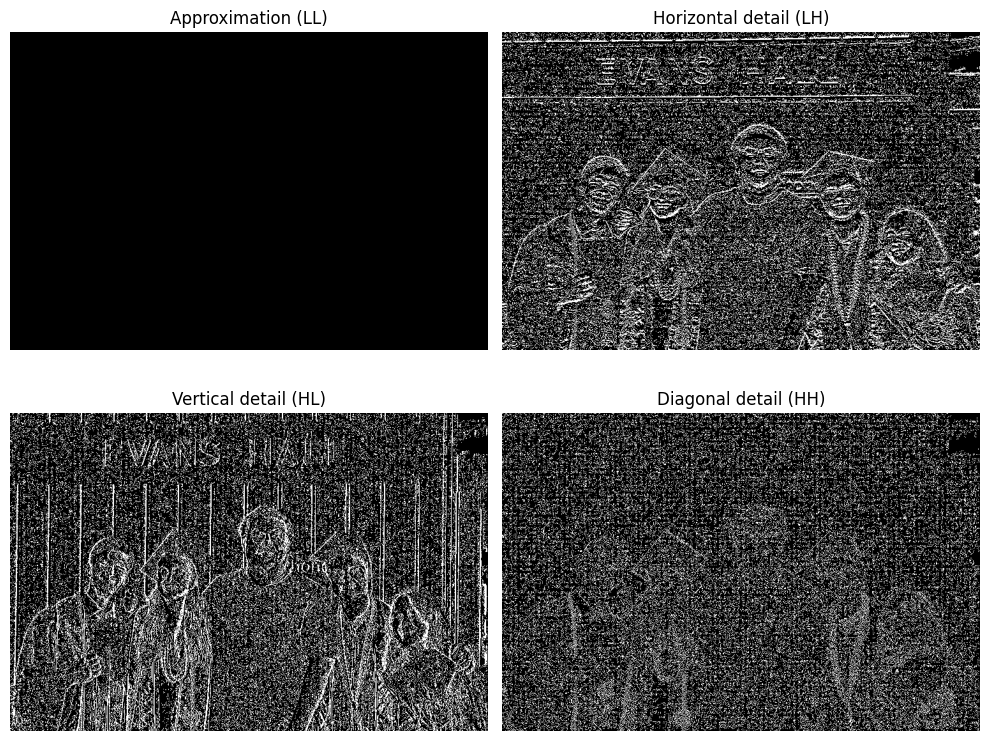

In [274]:
import pywt
from skimage import data


# Load the MIT cameraman image (grayscale)
#gray_img = data.camera()

# Perform 2D Haar wavelet transform

coeffs2 = pywt.dwt2(gray_img, 'haar')
LL, (LH, HL, HH) = coeffs2

# Binarize the coefficients: values > 0 become 1, else 0

if USE_THRESHOLD:
    threshold = master_threshold
    LL = (LL > threshold).astype(int)
    LH = (LH > threshold).astype(int)
    HL = (HL > threshold).astype(int)
    HH = (HH > threshold).astype(int)

if USE_BLUR:
    LL = gaussian_filter(LL, sigma=blur_level)
    LH = gaussian_filter(LH, sigma=blur_level)
    HL = gaussian_filter(HL, sigma=blur_level)
    HH = gaussian_filter(HH, sigma=blur_level)


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal detail (LH)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical detail (HL)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal detail (HH)')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.imsave('horizontal_detail_LH.png', LH, cmap='gray')
plt.imsave('diagonal_detail_HH.png', HH, cmap='gray')

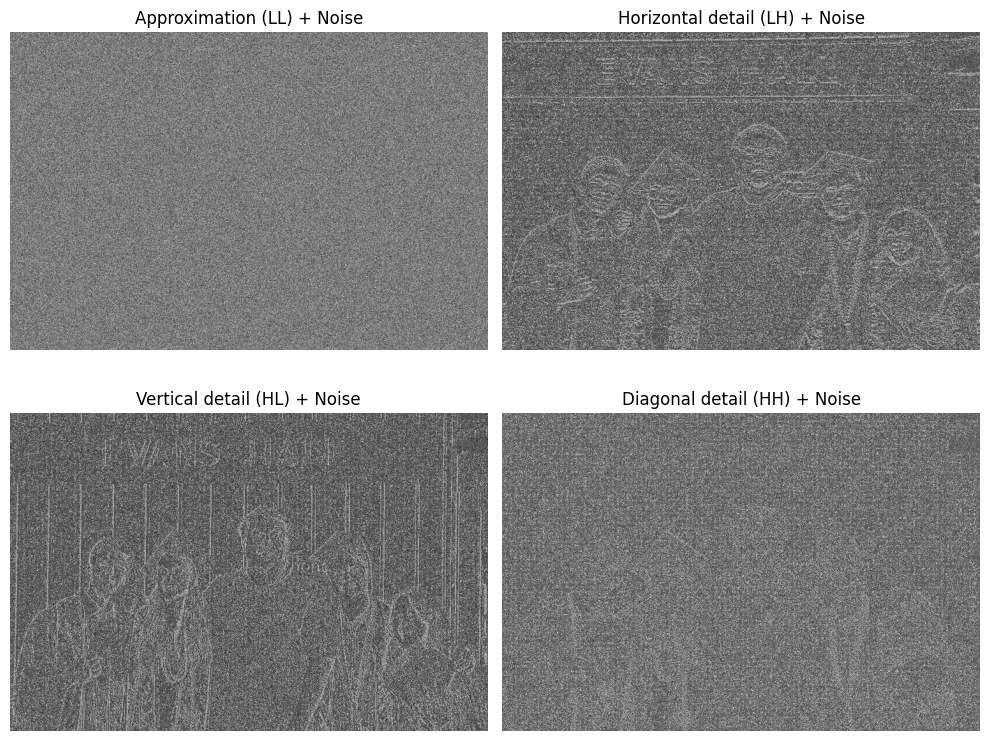

In [275]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
# gray_img = data.camera()

# Perform 2D Haar wavelet transform
coeffs2 = pywt.dwt2(gray_img, 'haar')
LL, (LH, HL, HH) = coeffs2

if USE_THRESHOLD:
    threshold = master_threshold
    LL = (LL > threshold).astype(int)
    LH = (LH > threshold).astype(int)
    HL = (HL > threshold).astype(int)
    HH = (HH > threshold).astype(int) 
if USE_BLUR:
    LL = gaussian_filter(LL, sigma=blur_level)
    LH = gaussian_filter(LH, sigma=blur_level)
    HL = gaussian_filter(HL, sigma=blur_level)
    HH = gaussian_filter(HH, sigma=blur_level)
# Add random Gaussian noise to all wavelet subbands
 # adjust as needed

LL_noisy = LL + np.random.normal(0, noise_level, LL.shape)
LH_noisy = LH + np.random.normal(0, noise_level, LH.shape)
HL_noisy = HL + np.random.normal(0, noise_level, HL.shape)
HH_noisy = HH + np.random.normal(0, noise_level, HH.shape)

# Display the noisy wavelet components
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(LL_noisy, cmap='gray')
plt.title('Approximation (LL) + Noise')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH_noisy, cmap='gray')
plt.title('Horizontal detail (LH) + Noise')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL_noisy, cmap='gray')
plt.title('Vertical detail (HL) + Noise')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH_noisy, cmap='gray')
plt.title('Diagonal detail (HH) + Noise')
plt.axis('off')

plt.tight_layout()
plt.show()
plt.imsave('horizontal_detail_LH_noisy.png', LH_noisy, cmap='gray')
plt.imsave('diagonal_detail_HH_noisy.png', HH_noisy, cmap='gray')

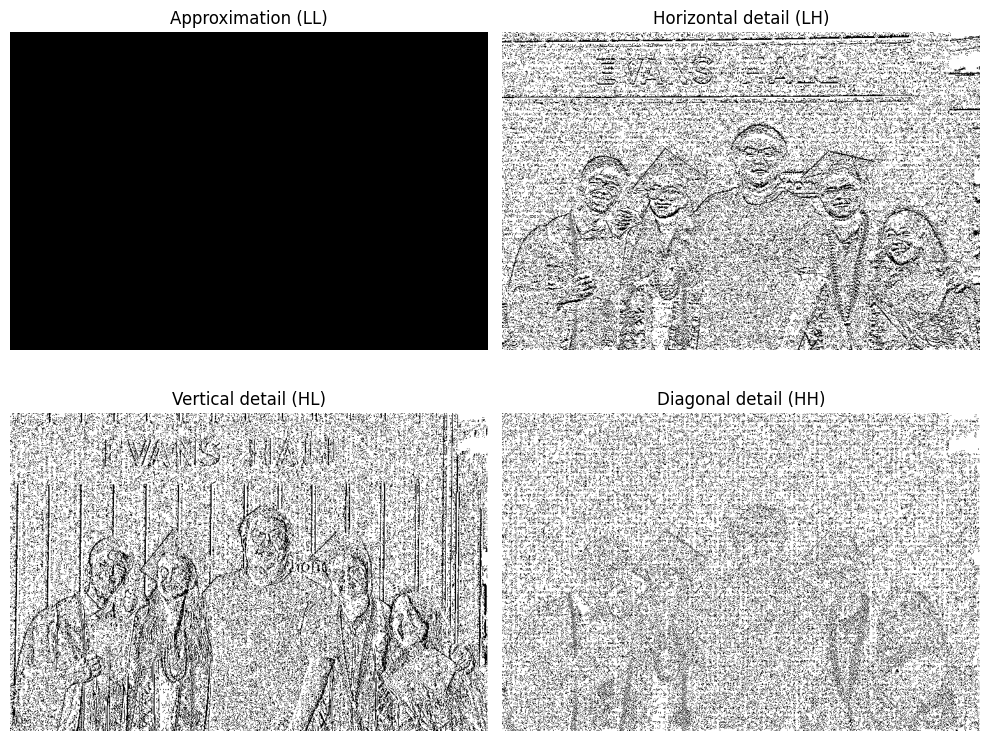

In [276]:
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
# gray_img = data.camera()
gray_img_inv = 255 - gray_img

# Perform 2D Haar wavelet transform
coeffs2 = pywt.dwt2(gray_img_inv, 'haar')
LL, (LH, HL, HH) = coeffs2

if USE_THRESHOLD:
    threshold = -master_threshold
    LL = (LL > threshold).astype(int)
    LH = (LH > threshold).astype(int)
    HL = (HL > threshold).astype(int)
    HH = (HH > threshold).astype(int) 

if USE_BLUR:
    LL = gaussian_filter(LL, sigma=blur_level)
    LH = gaussian_filter(LH, sigma=blur_level)
    HL = gaussian_filter(HL, sigma=blur_level)
    HH = gaussian_filter(HH, sigma=blur_level)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal detail (LH)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical detail (HL)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal detail (HH)')
plt.axis('off')

plt.tight_layout()
plt.show()
plt.imsave('horizontal_detail_LH_inverted.png', LH, cmap='gray')
plt.imsave('diagonal_detail_HH_inverted.png', HH, cmap='gray')

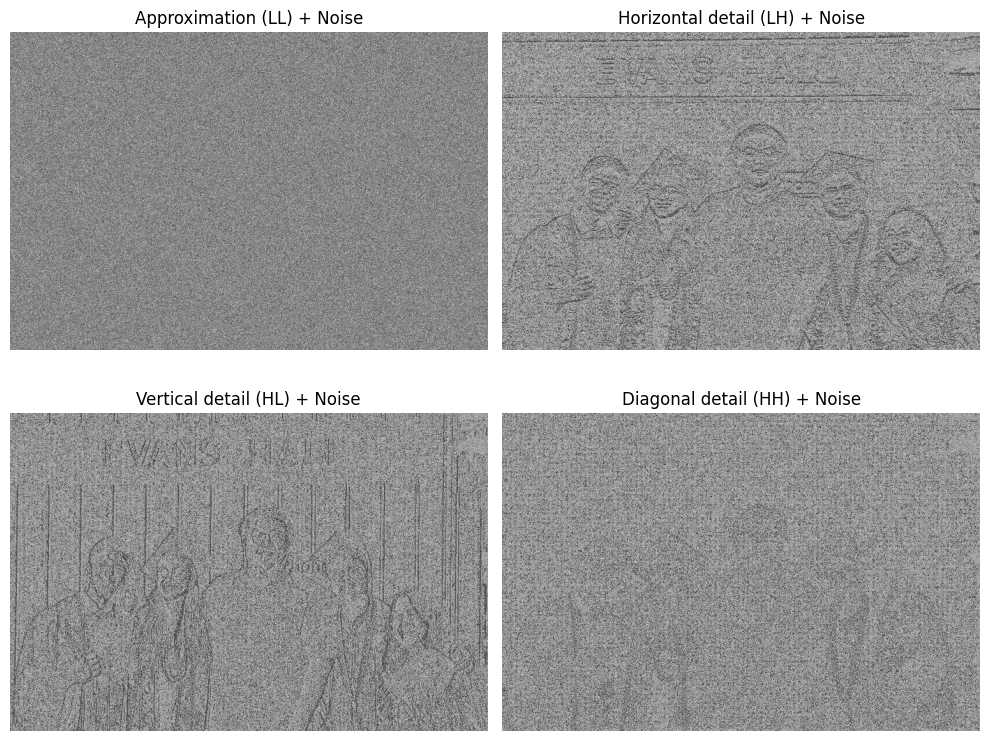

In [277]:

import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage import data

# Load the MIT cameraman image (grayscale)
# gray_img = data.camera()
gray_img_inv = 255 - gray_img

# Perform 2D Haar wavelet transform
coeffs2 = pywt.dwt2(gray_img_inv, 'haar')
LL, (LH, HL, HH) = coeffs2

if USE_THRESHOLD:
    threshold = -(master_threshold)
    LL = (LL > threshold).astype(int)
    LH = (LH > threshold).astype(int)
    HL = (HL > threshold).astype(int)
    HH = (HH > threshold).astype(int) 

if USE_BLUR:
    LL = gaussian_filter(LL, sigma=blur_level)
    LH = gaussian_filter(LH, sigma=blur_level)
    HL = gaussian_filter(HL, sigma=blur_level)
    HH = gaussian_filter(HH, sigma=blur_level)

# Add random Gaussian noise to all wavelet subbands
 # adjust as needed
LL_noisy = LL + np.random.normal(0, noise_level, LL.shape)
LH_noisy = LH + np.random.normal(0, noise_level, LH.shape)
HL_noisy = HL + np.random.normal(0, noise_level, HL.shape)
HH_noisy = HH + np.random.normal(0, noise_level, HH.shape)

# Display the noisy wavelet components
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(LL_noisy, cmap='gray')
plt.title('Approximation (LL) + Noise')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH_noisy, cmap='gray')
plt.title('Horizontal detail (LH) + Noise')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL_noisy, cmap='gray')
plt.title('Vertical detail (HL) + Noise')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH_noisy, cmap='gray')
plt.title('Diagonal detail (HH) + Noise')
plt.axis('off')

plt.tight_layout()
plt.show()
plt.imsave('horizontal_detail_LH_noisy_inverted.png', LH_noisy, cmap='gray')
plt.imsave('diagonal_detail_HH_noisy_inverted.png', HH_noisy, cmap='gray')
